In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.layers import Dense , Activation, Dropout
from keras.optimizers import Nadam

from keras import  backend as K

from subprocess import check_output
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.utils import to_categorical, plot_model

In [ ]:
from keras.datasets import mnist


(x_train, y_train),(x_test, y_test) = mnist.load_data()


unique, counts = np.unique(y_train, return_counts=True)
print("Train labels: ", dict(zip(unique, counts)))


unique, counts = np.unique(y_test, return_counts=True)
print("\nTest labels: ", dict(zip(unique, counts)))

11490434/11490434 [==============================] - 0s 0us/step
Train labels:  {0: 5923, 1: 6742, 2: 5958, 3: 6131, 4: 5842, 5: 5421, 6: 5918, 7: 6265, 8: 5851, 9: 5949}

Test labels:  {0: 980, 1: 1135, 2: 1032, 3: 1010, 4: 982, 5: 892, 6: 958, 7: 1028, 8: 974, 9: 1009}


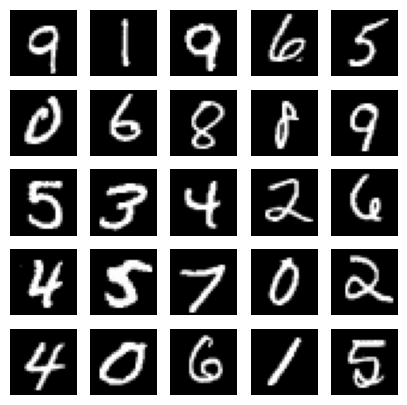

In [ ]:
indexes = np.random.randint(0, x_train.shape[0], size=25)
images = x_train[indexes]
labels = y_train[indexes]


plt.figure(figsize=(5,5))
for i in range(len(indexes)):
    plt.subplot(5, 5, i + 1)
    image = images[i]
    plt.imshow(image, cmap='gray')
    plt.axis('off')

plt.show()
plt.savefig("mnist-samples.png")
plt.close('all')

In [ ]:
num_labels = len(np.unique(y_train))


In [ ]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)


In [ ]:
image_size = x_train.shape[1]
input_size = image_size * image_size
input_size

784

In [ ]:
x_train = np.reshape(x_train, [-1, input_size])
x_train = x_train.astype('float32') / 255
x_test = np.reshape(x_test, [-1, input_size])
x_test = x_test.astype('float32') / 255

In [ ]:
batch_size = 128
hidden_units = 256
dropout = 0.45

In [ ]:
from keras.regularizers import l2
model = Sequential()
model.add(Dense(hidden_units,
                kernel_regularizer=l2(0.001),
                input_dim=input_size))
model.add(Activation('relu'))
model.add(Dropout(dropout))
model.add(Dense(hidden_units,
          kernel_regularizer=l2(0.001)))
model.add(Activation('relu'))
model.add(Dropout(dropout))
model.add(Dense(num_labels,
          kernel_regularizer=l2(0.001)))
model.add(Activation('softmax'))

Dense layer has a Relu activation function and the last one has Softmax

The Dropout layer is used to turn off the given percentage of neurons during training which prevents overtraining

In [ ]:
model.summary()


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_11 (Dense)            (None, 256)               200960    
                                                                 
 activation_10 (Activation)  (None, 256)               0         
                                                                 
 dropout_7 (Dropout)         (None, 256)               0         
                                                                 
 dense_12 (Dense)            (None, 256)               65792     
                                                                 
 activation_11 (Activation)  (None, 256)               0         
                                                                 
 dropout_8 (Dropout)         (None, 256)               0         
                                                                 
 dense_13 (Dense)            (None, 10)               

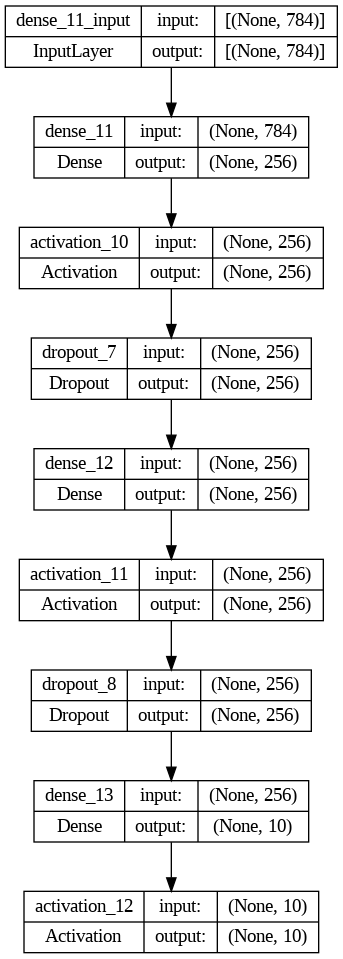

In [ ]:
plot_model(model, show_shapes=True)

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer='nadam',
              metrics=['accuracy'])

In [ ]:
model.fit(x_train, y_train, epochs=20, batch_size=batch_size)


Epoch 1/20
469/469 [==============================] - 6s 10ms/step - loss: 0.8318 - accuracy: 0.8681
Epoch 2/20
469/469 [==============================] - 6s 12ms/step - loss: 0.4554 - accuracy: 0.9371
Epoch 3/20
469/469 [==============================] - 5s 10ms/step - loss: 0.3753 - accuracy: 0.9459
Epoch 4/20
469/469 [==============================] - 6s 12ms/step - loss: 0.3439 - accuracy: 0.9512
Epoch 5/20
469/469 [==============================] - 5s 11ms/step - loss: 0.3305 - accuracy: 0.9520
Epoch 6/20
469/469 [==============================] - 5s 10ms/step - loss: 0.3238 - accuracy: 0.9543
Epoch 7/20
469/469 [==============================] - 6s 12ms/step - loss: 0.3186 - accuracy: 0.9560
Epoch 8/20
469/469 [==============================] - 5s 10ms/step - loss: 0.3168 - accuracy: 0.9560
Epoch 9/20
469/469 [==============================] - 6s 12ms/step - loss: 0.3145 - accuracy: 0.9563
Epoch 10/20
469/469 [==============================] - 5s 10ms/step - loss: 0.3127 - accura

In [ ]:
loss, acc = model.evaluate(x_test, y_test, batch_size=batch_size)
print(f"\nTest accuracy: {round((100.0 * acc),2)}")

79/79 [==============================] - 0s 6ms/step - loss: 0.2586 - accuracy: 0.9732

Test accuracy: 97.32


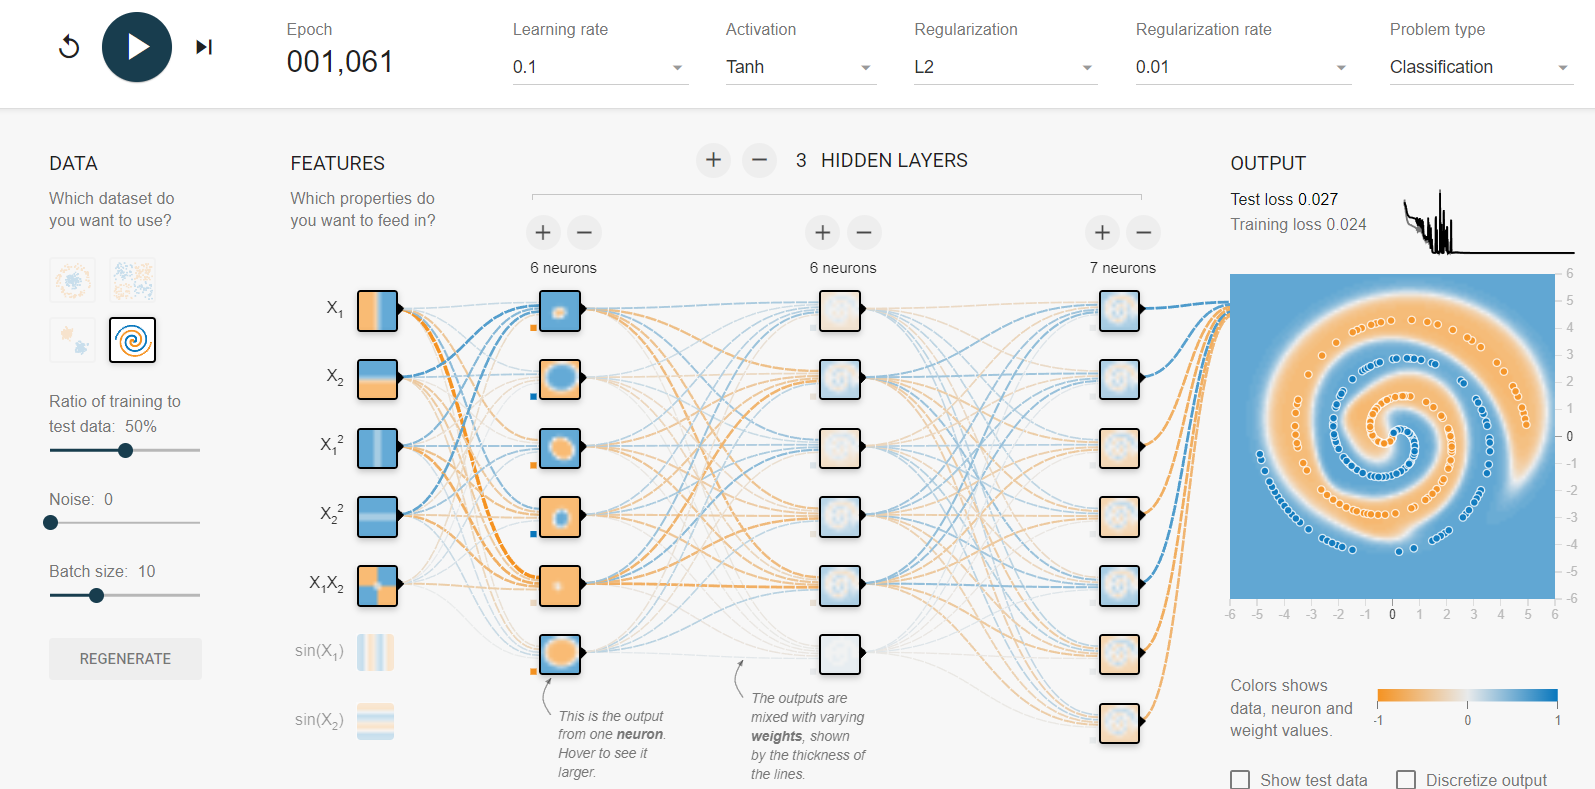

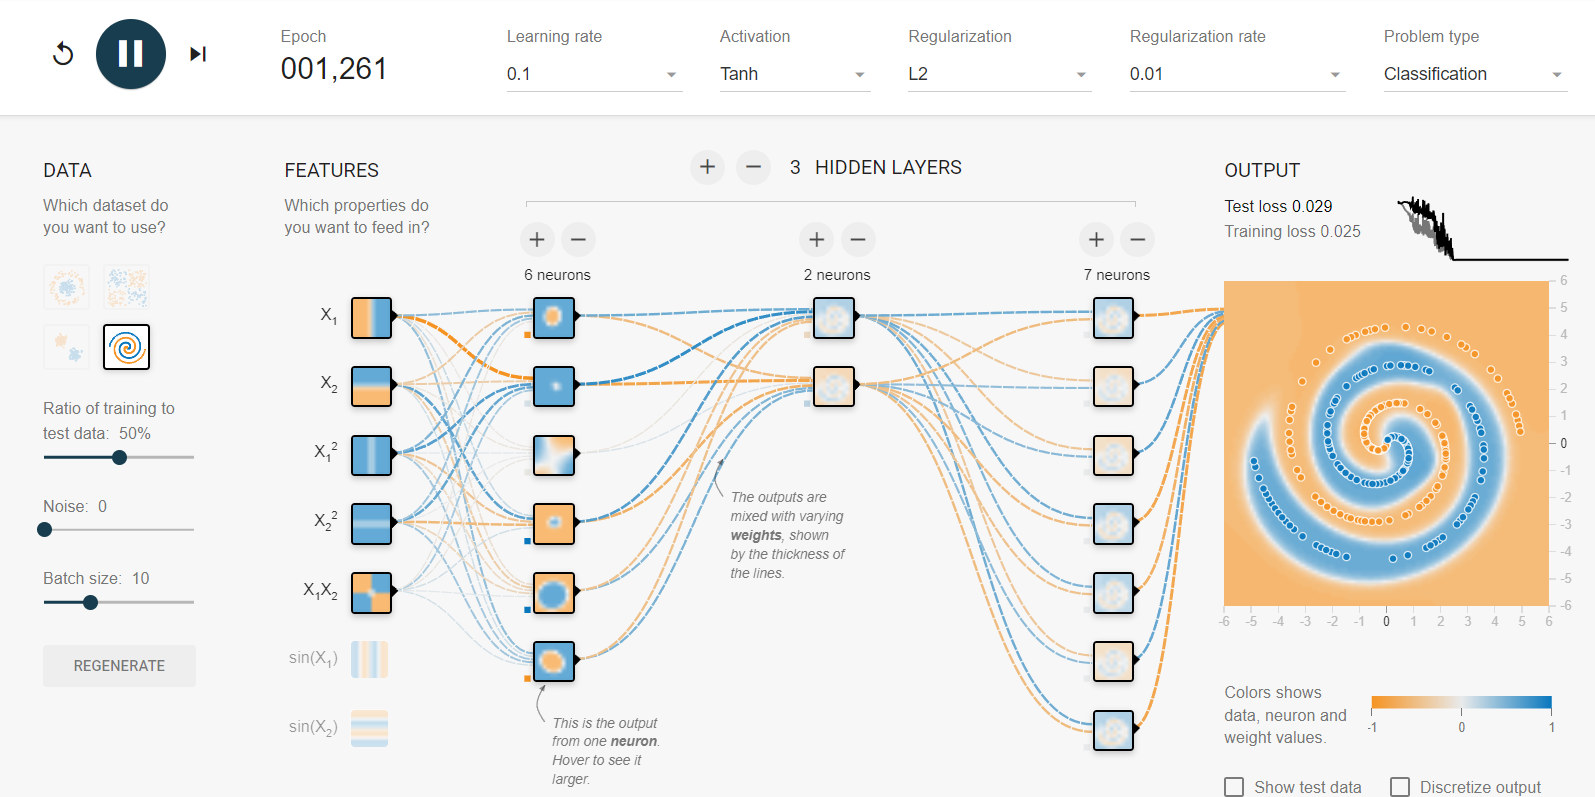